# **Classifying Hypertension Risk in the African-American Community Using NHANES Data**

## **Problem Statement**
Hypertension, or high blood pressure, is a critical public health concern in the United States, disproportionately affecting the African-American community. Studies show that African-Americans develop hypertension earlier and at higher rates than other racial groups, leading to increased risks of heart disease, stroke, and other complications. 

The goal of this project is to build a **classification model** that predicts an individual's risk of hypertension based on lifestyle and socioeconomic factors using data from the **National Health and Nutrition Examination Survey (NHANES)**. By identifying key predictors such as **age, diet, physical activity, and healthcare access**, this model can help improve early detection and preventive strategies.

## **Research Questions**
This study aims to answer the following key questions:
- What are the most important predictors of hypertension in the African-American community?
- How well can a machine learning model classify individuals as hypertensive or non-hypertensive based on NHANES data?
- Can insights from this model inform targeted health interventions to reduce hypertension risk?

## **Importance of the Study**
Hypertension is a major contributor to health disparities in the U.S., particularly among African-Americans. If we can better understand the lifestyle and socioeconomic factors contributing to high blood pressure, we can develop more effective **public health strategies** and **personalized interventions**. However, ethical concerns such as **data bias and misinterpretation of findings** must be carefully considered to ensure responsible and fair use of predictive modeling in healthcare.


## **Data Source**
The dataset used for this project comes from the **National Health and Nutrition Examination Survey (NHANES)**, which is publicly available through the Centers for Disease Control and Prevention (CDC). NHANES collects extensive health-related data through physical examinations, laboratory tests, and surveys.

📌 **Source:**  
- [CDC NHANES Data](https://wwwn.cdc.gov/nchs/nhanes/)
- [NHANES on Kaggle](https://www.kaggle.com/datasets/cdc/national-health-and-nutrition-examination-survey)

## **Dataset Overview**
To build a classification model for hypertension risk, we will use the following NHANES datasets:

1. **Demographics Data (`demographic.csv`)**
   - Includes participant age, gender, race, education, and income.
   - Key Variables:  
     - `RIDRETH1` → Race/Ethnicity (filtering for African-Americans)  
     - `RIDAGEYR` → Age  
     - `RIAGENDR` → Gender  
     - `DMDEDUC2` → Education level  
     - `INDHHIN2` → Household income  

2. **Examination Data (`examination.csv`)**
   - Contains direct measurements, including **blood pressure readings**.
   - Key Variables:
     - `BPXSY1`, `BPXDI1` → First systolic & diastolic blood pressure reading  
     - `BPXSY2`, `BPXDI2` → Second systolic & diastolic reading  
     - **Hypertension Definition:** Systolic BP ≥ 130 mmHg or Diastolic BP ≥ 80 mmHg  

3. **Dietary Data (`dietary.csv`)**
   - Provides information on **nutrient intake**.
   - Key Variables:
     - `DR1TSODI` → Sodium intake  
     - `DR1TKCAL` → Total daily calories  
     - `DR1TPOTA` → Potassium intake  

4. **Physical Activity Data (`physical_activity.csv`)**
   - Measures **physical activity levels**.
   - Key Variables:
     - `PAQ605` → Days of moderate activity per week  
     - `PAQ620` → Days of vigorous activity per week  

5. **Healthcare Access Data (`questionnaire.csv`)**
   - Captures access to healthcare and general health perception.
   - Key Variables:
     - `HIQ011` → Health insurance status (Yes/No)  
     - `HUQ030` → General health condition (Excellent/Poor)  

## **Why This Dataset?**
- **Comprehensive Data**: NHANES offers detailed health and lifestyle factors crucial for predicting hypertension.  
- **Real-world Relevance**: The data is collected through nationally representative sampling, making it valuable for understanding public health trends.  
- **Feature Availability**: The dataset includes key risk factors such as **age, diet, physical activity, and healthcare access**, allowing us to explore their relationship with hypertension.


In [19]:
import pandas as pd 
import numpy as np


In [28]:
import pandas as pd

# Load datasets (replace with actual file paths)
demographics = pd.read_csv("/Users/orlandobrandon/Desktop/Project 2 Data mining /archive (6)/demographic.csv")
examination = pd.read_csv("/Users/orlandobrandon/Desktop/Project 2 Data mining /archive (6)/examination.csv")
dietary = pd.read_csv("/Users/orlandobrandon/Desktop/Project 2 Data mining /archive (6)/diet.csv")
questionnaire = pd.read_csv("/Users/orlandobrandon/Desktop/Project 2 Data mining /archive (6)/questionnaire.csv")

# Step 1: Filter for African-American participants
african_american_data = demographics[demographics["RIDRETH1"] == 4]  # 4 corresponds to African-Americans

# Step 2: Merge datasets on 'SEQN'
merged_df = african_american_data.merge(examination, on="SEQN", how="inner")
merged_df = merged_df.merge(dietary, on="SEQN", how="inner")
merged_df = merged_df.merge(questionnaire, on="SEQN", how="inner")

# Step 3: Handle missing values (drop rows with too many missing values)
merged_df = merged_df.dropna(subset=["BPXSY1", "BPXDI1", "DR1TSODI", "PAQ605", "HIQ011"])

# Step 4: Define Hypertension Label (1 = Hypertensive, 0 = Non-Hypertensive)
merged_df["Hypertension"] = ((merged_df["BPXSY1"] >= 130) | (merged_df["BPXDI1"] >= 80)).astype(int)

# Display the first few rows using Pandas
print(merged_df.head())



     SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0   73557         8         2         1        69       NaN         4   
4   73576         8         2         1        16       NaN         4   
5   73580         8         2         2        38       NaN         4   
9   73600         8         2         1        37       NaN         4   
10  73613         8         2         2        60       NaN         4   

    RIDRETH3  RIDEXMON  RIDEXAGM  ...  WHD080L  WHD110  WHD120  WHD130  \
0          4       1.0       NaN  ...     40.0   270.0   200.0    69.0   
4          4       2.0     194.0  ...      NaN     NaN     NaN     NaN   
5          4       1.0       NaN  ...      NaN   190.0   190.0     NaN   
9          4       2.0       NaN  ...      NaN   250.0   275.0     NaN   
10         4       2.0       NaN  ...      NaN   185.0   150.0    66.0   

    WHD140  WHQ150  WHQ030M  WHQ500  WHQ520  Hypertension  
0    270.0    62.0      NaN     NaN     NaN             

In [26]:
merged_df["Hypertension"].value_counts()


Hypertension
0    762
1    462
Name: count, dtype: int64

/var/folders/k3/0zwl8wss71gb3sn80bccz8sc0000gn/T/ipykernel_62404/3537180236.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=merged_df["Hypertension"].value_counts().index,


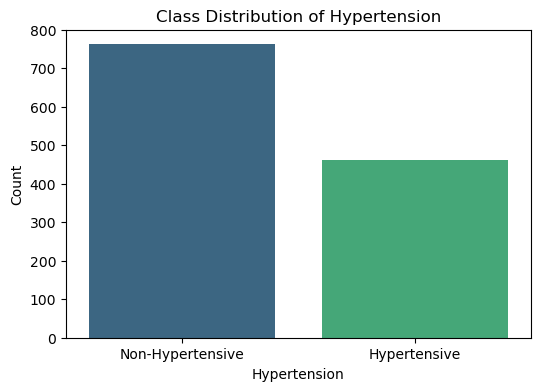

/var/folders/k3/0zwl8wss71gb3sn80bccz8sc0000gn/T/ipykernel_62404/3537180236.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=merged_df["Hypertension"], y=merged_df["RIDAGEYR"], palette="coolwarm")


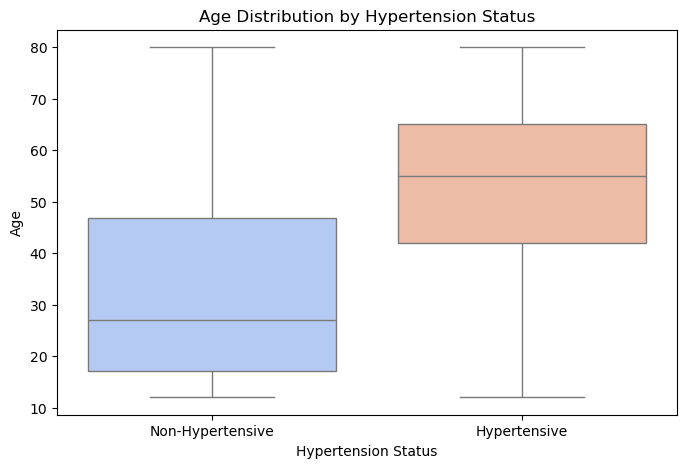

/var/folders/k3/0zwl8wss71gb3sn80bccz8sc0000gn/T/ipykernel_62404/3537180236.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=merged_df["Hypertension"], y=merged_df["DR1TSODI"], palette="magma")


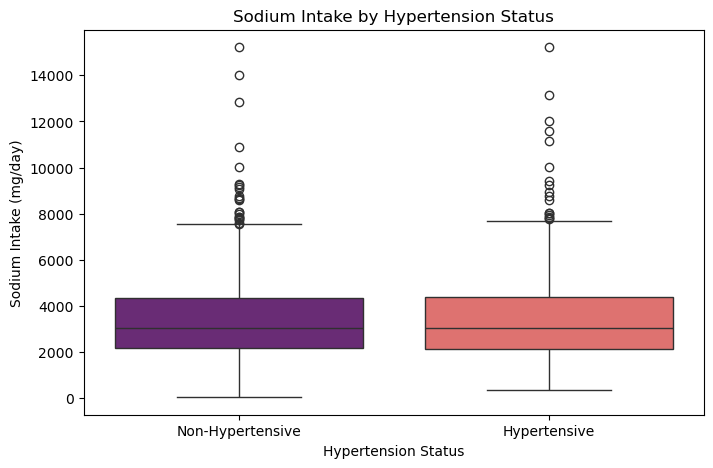

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class Distribution of Hypertension
plt.figure(figsize=(6,4))
sns.barplot(x=merged_df["Hypertension"].value_counts().index, 
            y=merged_df["Hypertension"].value_counts().values, 
            palette="viridis")
plt.xticks(ticks=[0, 1], labels=["Non-Hypertensive", "Hypertensive"])
plt.ylabel("Count")
plt.title("Class Distribution of Hypertension")
plt.show()

# Age vs. Hypertension
plt.figure(figsize=(8,5))
sns.boxplot(x=merged_df["Hypertension"], y=merged_df["RIDAGEYR"], palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Non-Hypertensive", "Hypertensive"])
plt.xlabel("Hypertension Status")
plt.ylabel("Age")
plt.title("Age Distribution by Hypertension Status")
plt.show()

# Sodium Intake vs. Hypertension
plt.figure(figsize=(8,5))
sns.boxplot(x=merged_df["Hypertension"], y=merged_df["DR1TSODI"], palette="magma")
plt.xticks(ticks=[0, 1], labels=["Non-Hypertensive", "Hypertensive"])
plt.xlabel("Hypertension Status")
plt.ylabel("Sodium Intake (mg/day)")
plt.title("Sodium Intake by Hypertension Status")
plt.show()
